<a href="https://colab.research.google.com/github/Irfan17-Stack/Pembelajaran_mesin_Irfan-Firmansyah_22115330002/blob/main/PEKAN_6_SVM_NON_LINIEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

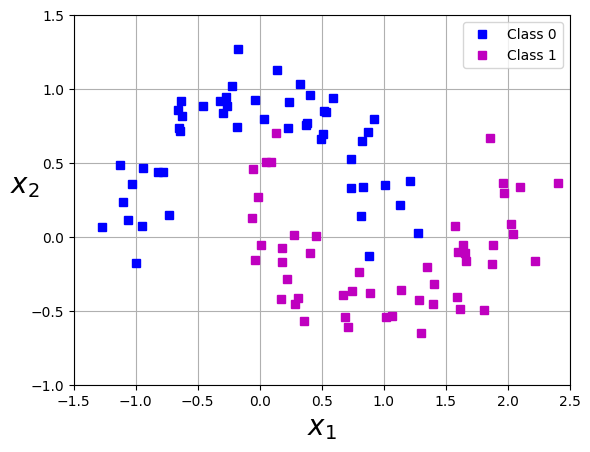

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Membuat dataset make_moons
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(x, y, axes):
    # Memplot data
    plt.plot(x[y == 0, 0], x[y == 0, 1], "bs", label='Class 0')  # blue squares for class 0
    plt.plot(x[y == 1, 0], x[y == 1, 1], "ms", label='Class 1')  # magenta squares for class 1

    # Pengaturan sumbu
    plt.axis(axes)
    plt.grid(True, which='both')

    # Label sumbu
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

    # Menampilkan legenda
    plt.legend()

# Plot dataset
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()


In [3]:
def plot_predictions(clf, axes):
     x0s = np.linspace (axes[0], axes[1], 100)
     x1s = np.linspace (axes[2], axes[3], 100)

     x0,x1 = np.meshgrid(x0s,x1s)
     x=np.c_[x0.ravel(),x1.ravel()]
     y_pred = clf.predict(x).reshape(x0.shape)
     y_decision = clf.decison_function(x).reshape(x0.shape)
     plt.contourf(x0,x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
     plt.contourf(x0,x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


In [4]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Membuat pipeline
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
))

# Melatih model
polynomial_svm_clf.fit(x, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

AttributeError: 'Pipeline' object has no attribute 'decison_function'

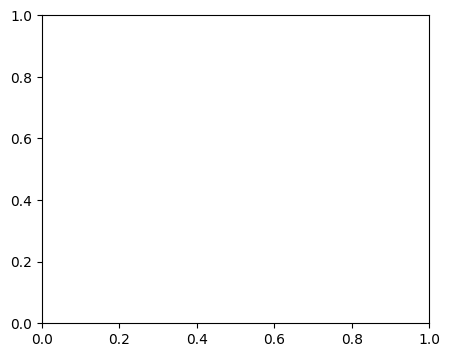

In [5]:
plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title("moons dataset, polynomial kernel", fontsize=14)
plt.show()